In [1]:
#Project 1, Zoo dataset

authors = ["Burhan Syed", "Gabby"]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from sklearn import (datasets, metrics,
                     model_selection as skms,
                     naive_bayes, neighbors, dummy)

In [3]:
#setting up
zoo_original_df = pd.read_csv('zoo_train.csv')
#display(zoo_original_df)
features_to_analyze=['hair',
                    'feathers',
                    'eggs',
                    'milk',
                    'airborne',
                    'aquatic',
                    'backbone',
                    'breathes',
                    'fins',
                    'legs']

display(zoo_original_df.info())
zoo_original_df.dropna(inplace=True)
zoo_tgt = zoo_original_df['class']
zoo_ftrs = zoo_original_df[features_to_analyze]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        69 non-null     int64 
 1   name      69 non-null     object
 2   hair      69 non-null     int64 
 3   feathers  69 non-null     int64 
 4   eggs      69 non-null     int64 
 5   milk      69 non-null     int64 
 6   airborne  69 non-null     int64 
 7   aquatic   69 non-null     int64 
 8   predator  69 non-null     int64 
 9   toothed   69 non-null     int64 
 10  backbone  69 non-null     int64 
 11  breathes  69 non-null     int64 
 12  venomous  69 non-null     int64 
 13  fins      69 non-null     int64 
 14  legs      69 non-null     int64 
 15  tail      69 non-null     int64 
 16  domestic  69 non-null     int64 
 17  catsize   69 non-null     int64 
 18  class     69 non-null     int64 
dtypes: int64(18), object(1)
memory usage: 10.4+ KB


None

In [4]:
#splitting for train,test

(zoo_train_p_validation_ftrs, zoo_test_ftrs,
zoo_train_p_validation_tgt, zoo_test_tgt) = skms.train_test_split(zoo_ftrs,
                                                                 zoo_tgt,
                                                                 test_size=.25)
(zoo_train_ftrs, zoo_validation_ftrs,
zoo_train_tgt, zoo_validation_tgt) = skms.train_test_split(zoo_train_p_validation_ftrs,
                                                          zoo_train_p_validation_tgt,
                                                          test_size=.33)

print(f'Train: {len(zoo_train_tgt)/len(zoo_original_df):.2f}')
print(f'Validation: {len(zoo_validation_tgt)/len(zoo_original_df):.2f}')
print(f'Test: {len(zoo_test_tgt)/len(zoo_original_df):.2f}')
display(zoo_train_ftrs)
display(zoo_train_tgt)

Train: 0.49
Validation: 0.25
Test: 0.26


,hair,feathers,eggs,milk,airborne,aquatic,backbone,breathes,fins,legs
50,1,0,0,1,0,0,1,1,0,4
26,0,0,1,0,0,1,1,1,0,4
54,1,0,0,1,0,0,1,1,0,4
30,0,0,1,0,1,0,0,1,0,6
42,0,0,1,0,1,0,0,1,0,6
58,0,1,1,0,0,1,1,1,0,2
24,0,0,1,0,0,0,0,1,0,6
65,1,0,0,1,0,0,1,1,0,4
41,0,1,1,0,0,0,1,1,0,2
27,1,0,0,1,1,0,1,1,0,2


50    1
26    5
54    1
30    6
42    6
58    2
24    6
65    1
41    2
27    1
56    2
60    4
28    1
18    4
43    2
36    1
45    1
57    2
59    2
17    1
5     1
0     1
64    1
67    1
53    7
1     1
34    4
62    3
2     4
9     1
35    1
15    7
47    1
20    2
Name: class, dtype: int64

In [20]:
#training models
models = {
    
    'Baseline' : dummy.DummyClassifier(strategy = 'most_frequent'),
    'Naive Bayes' : naive_bayes.GaussianNB(),
}
for k in range (1,10,2): 
    models[f'{k}-NN'] = neighbors.KNeighborsClassifier(n_neighbors = k)

C:\Users\burha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\burha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\burha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\burha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\burha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least

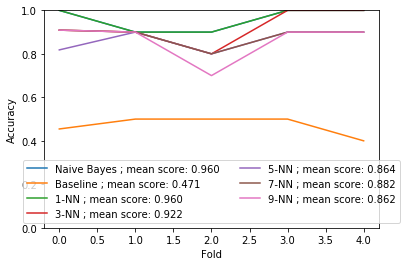

In [19]:
fig,ax = plt.subplots(figsize=(6,4))
for name, model in models.items():
    cv_scores = skms.cross_val_score(model,
                                    zoo_train_p_validation_ftrs, 
                                    zoo_train_p_validation_tgt,
                                     cv=5,
                                     scoring='accuracy',
                                    )
    my_lbl="{} ; mean score: {:.3f}".format(name,cv_scores.mean())
    ax.plot(cv_scores,label=my_lbl)#,marker=next(markers))
    ax.set_ylim(0.0,1,1)
    ax.set_xlabel('Fold')
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower center', ncol=2);

In [21]:
accs = {}
for model in models: 
    fit = models[model].fit(zoo_train_ftrs, zoo_train_tgt)
    pred = fit.predict(zoo_validation_ftrs)
    acc = metrics.accuracy_score(zoo_validation_tgt, pred)
    print(f'model: {model}, acc: {acc:0.2f}')
    #cm = metrics.confusion_matrix(zoo_validation_tgt, pred, labels=zoo_validation_tgt.unique())
    #fig,ax=plt.subplots(1,1,figsize=(4,4))
    #ax=sns.heatmap(cm, annot=True,square=True,
                   #xticklabels=zoo_validation_tgt.unique(),
                   #yticklabels=zoo_validation_tgt.unique())
    #ax.set_xlabel('Predicted')
    #ax.set_ylabel('Actual')
    
    

model: Baseline, acc: 0.47
model: Naive Bayes, acc: 1.00
model: 1-NN, acc: 1.00
model: 3-NN, acc: 0.88
model: 5-NN, acc: 0.88
model: 7-NN, acc: 0.88
model: 9-NN, acc: 0.59


In [22]:
#testing
best_model = naive_bayes.GaussianNB()#neighbors.KNeighborsClassifier(n_neighbors=1)
fit = best_model.fit(zoo_train_ftrs,zoo_train_tgt)
pred = fit.predict(zoo_test_ftrs)
acc = metrics.accuracy_score(zoo_test_tgt,pred)
print(f'test acc: {acc:0.2f}')

test acc: 0.83


### 